<a href="https://colab.research.google.com/github/IndeewaAmarasinghe/DL_Assignment/blob/main/DNN_model_Hansali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/content/Reviews.csv')  # Change this to your dataset path
data = data[['Text', 'Score']]  # Adjust based on your actual column names
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)  # Positive (4, 5) = 1, Negative (1, 2) = 0

# Preprocess the data
X = data['Text']
y = data['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
max_words = 5000  # Reduce max_words for faster processing
max_len = 100  # Reduce max_len to make the sequences shorter
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the DNN model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))  # Reduce the size of embeddings
model.add(Flatten())  # Flatten the 2D embeddings into 1D
model.add(Dense(64, activation='relu'))  # Reduce the number of units
model.add(Dropout(0.3))  # Slightly reduce the dropout
model.add(Dense(32, activation='relu'))  # Reduce the number of units
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)  # Early stopping to prevent overfitting
history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=5,  # Reduce epochs for quicker training
                    batch_size=128,  # Increase batch size to speed up training
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 97s 27ms/step - accuracy: 0.8689 - loss: 0.3118 - val_accuracy: 0.9124 - val_loss: 0.2177
Epoch 2/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 143s 27ms/step - accuracy: 0.9308 - loss: 0.1801 - val_accuracy: 0.9176 - val_loss: 0.2104
Epoch 3/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - accuracy: 0.9582 - loss: 0.1138 - val_accuracy: 0.9188 - val_loss: 0.2435
Epoch 4/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - accuracy: 0.9725 - loss: 0.0763 - val_accuracy: 0.9185 - val_loss: 0.2891
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9190 - loss: 0.2892
Test Accuracy: 0.9185


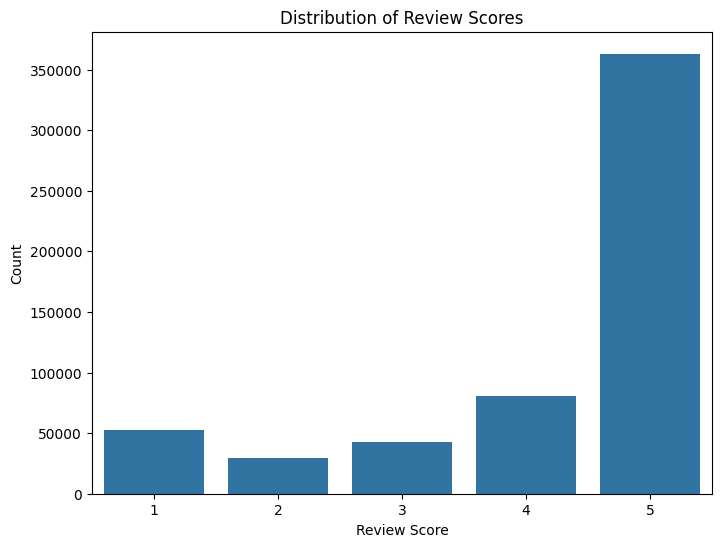

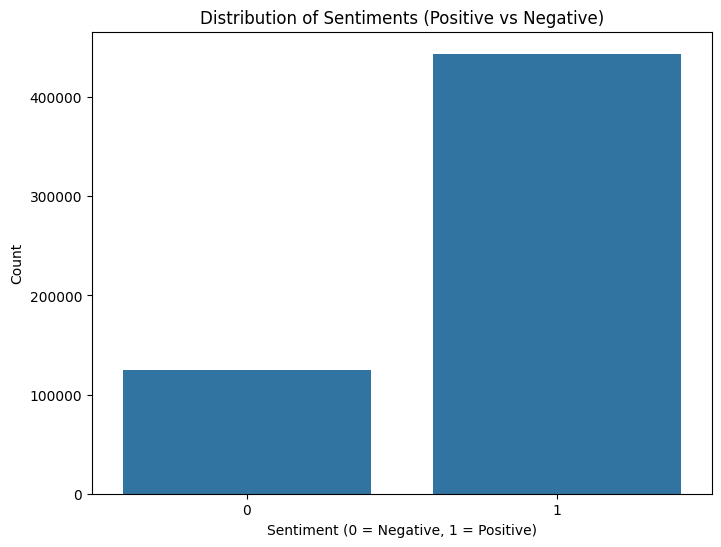

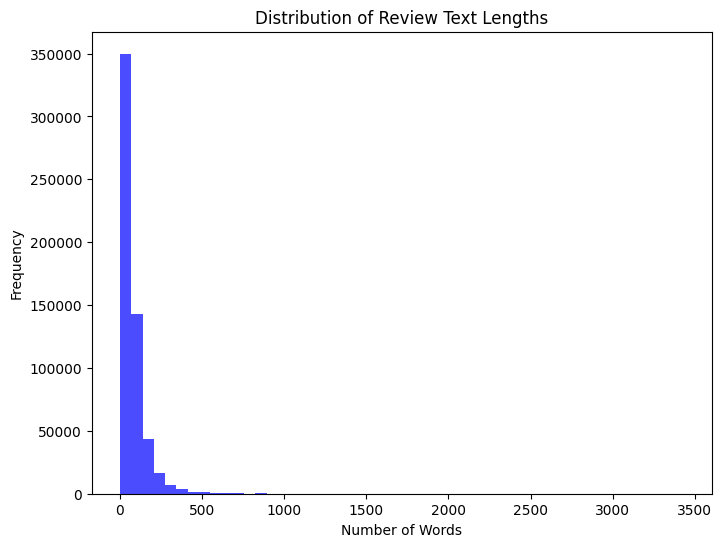

Epoch 1/5
3551/3553 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9797 - loss: 0.0564Epoch 2/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - accuracy: 0.9844 - loss: 0.0443 - val_accuracy: 0.9163 - val_loss: 0.4028
Epoch 3/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 96s 27ms/step - accuracy: 0.9871 - loss: 0.0366 - val_accuracy: 0.9155 - val_loss: 0.4139
Epoch 4/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - accuracy: 0.9888 - loss: 0.0314 - val_accuracy: 0.9161 - val_loss: 0.5051
Epoch 5/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 103s 29ms/step - accuracy: 0.9905 - loss: 0.0267 - val_accuracy: 0.9153 - val_loss: 0.5381


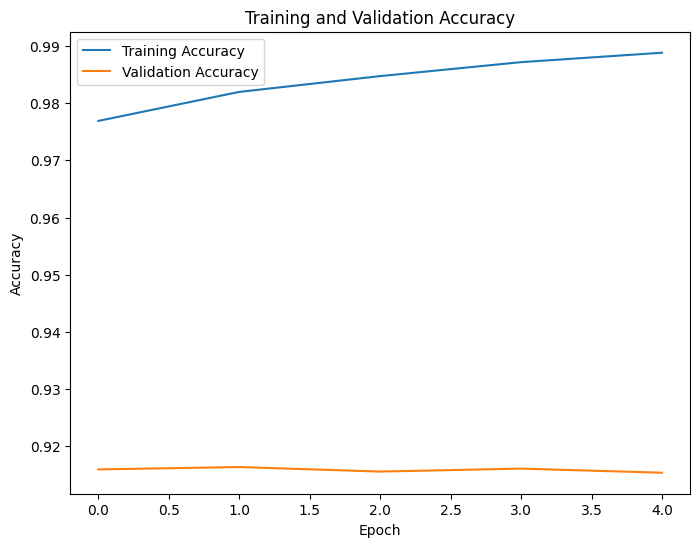

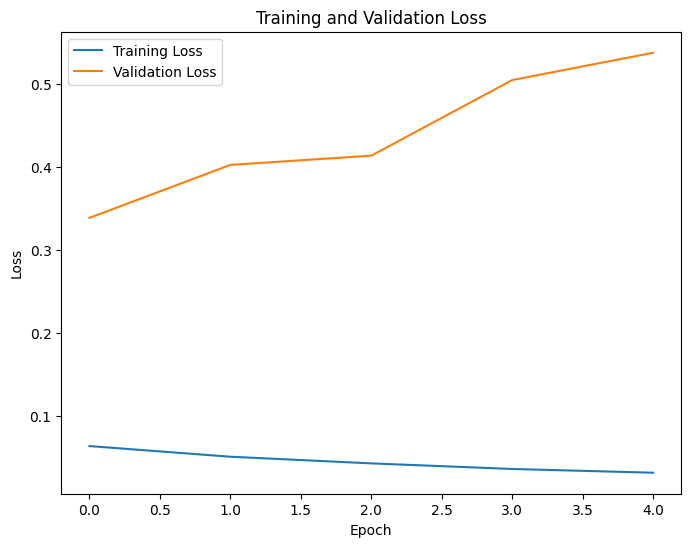

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiments (Positive vs Negative)')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# 3. Review text length distribution
data['Review_Length'] = data['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(data['Review_Length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Assuming your DNN model has been defined and trained earlier.
# The training process:
history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=5,
                    batch_size=128,
                    verbose=1)

# 4. Plotting Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. Plotting Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 96s 27ms/step - accuracy: 0.9904 - loss: 0.0274 - val_accuracy: 0.9153 - val_loss: 0.5708
Epoch 2/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.9157 - val_loss: 0.6405
Epoch 3/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 143s 28ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9134 - val_loss: 0.6302
Epoch 4/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 94s 27ms/step - accuracy: 0.9936 - loss: 0.0183 - val_accuracy: 0.9167 - val_loss: 0.6962
Epoch 5/5
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9152 - val_loss: 0.7192
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9168 - loss: 0.7163
Accuracy: 91.52%
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
Classification Report:

              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80     24666
    Positive       0.94      0.95      0.95     89025

    accuracy     

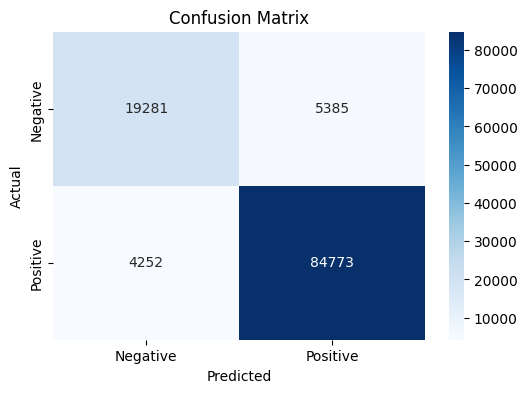

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predict sentiment on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3553/3553 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
Review: Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They're crunchy and true to the texture of the other "real" cookies that aren't gluten-free.  Some might think that the filling makes them a bit too sweet, but for me that just means I've satisfied my sweet tooth sooner!  The chocolate version from Glutino is just as good and has a true "chocolatey" taste - something that isn't there with the other gluten-free brands out there.
Predicted Sentiment: Positive
Actual Sentiment: Positive

Review: My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these are perfect for her. I've given her all three flavors and she seems to like them all equally. They do tend to dry out by the time I near the end of the bottle, however. The flip-top lid is very hand

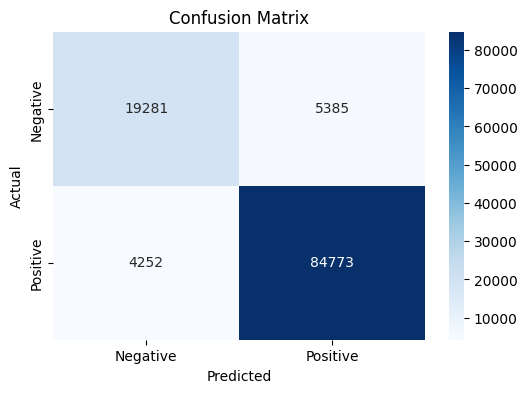

In [ ]:
# Predict the sentiment for the test set
y_pred_probs = model.predict(X_test_pad)  # Returns probabilities

# Convert probabilities to binary values (0 = Negative, 1 = Positive)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Display the first 10 predictions and the corresponding actual sentiments
for i in range(10):
    print(f"Review: {X_test.iloc[i]}")  # Display the review text
    print(f"Predicted Sentiment: {'Positive' if y_pred[i][0] == 1 else 'Negative'}")
    print(f"Actual Sentiment: {'Positive' if y_test.iloc[i] == 1 else 'Negative'}\n")

# Evaluate accuracy
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Display classification report for precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix to show performance visually
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# New unseen reviews for testing (you can replace these with real reviews)
new_reviews = [
    "This product was absolutely amazing! Loved it.",
    "I hated this product, it was terrible.",
    "The quality is okay, not too bad but not great either.",
    "Really fast delivery but the product didn’t meet my expectations.",
    "Fantastic product, I will buy again!",
    "Not worth the price at all. Very disappointed.",
    "disappointed.",
    "Good.",
    "very bad",
    "Amazing"
]

# Preprocess the new reviews (tokenize and pad them just like in training)
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=max_len)  # Make sure to use max_len defined during training

# Predict sentiment on new data
new_predictions_probs = model.predict(new_data)
new_predictions = (new_predictions_probs > 0.5).astype("int32")

# Print the results
for i, review in enumerate(new_reviews):
    predicted_sentiment = "Positive" if new_predictions[i][0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Prediction Probability: {new_predictions_probs[i][0]:.2f}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Review: This product was absolutely amazing! Loved it.
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: I hated this product, it was terrible.
Predicted Sentiment: Negative
Prediction Probability: 0.00

Review: The quality is okay, not too bad but not great either.
Predicted Sentiment: Negative
Prediction Probability: 0.07

Review: Really fast delivery but the product didn’t meet my expectations.
Predicted Sentiment: Positive
Prediction Probability: 0.98

Review: Fantastic product, I will buy again!
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: Not worth the price at all. Very disappointed.
Predicted Sentiment: Negative
Prediction Probability: 0.00

Review: disappointed.
Predicted Sentiment: Negative
Prediction Probability: 0.06

Review: Good.
Predicted Sentiment: Positive
Prediction Probability: 1.00

Review: very bad
Predicted Sentiment: Negative
Prediction Probability: 0.04

Review: Amazing
Predicted Sent